In [1]:
#Importing all the libraries that we need.

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
#importing our dataset.
path='/content/drive/MyDrive/Walmart Data Analysis and Forcasting.csv'
df=pd.read_csv(path)

In [4]:
#checking first five rows by calling df.head()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [8]:
#Take a look at the column values
df.columns.values

array(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'], dtype=object)

In [9]:
#Checking for Null Values
df.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [10]:
#Concise Summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


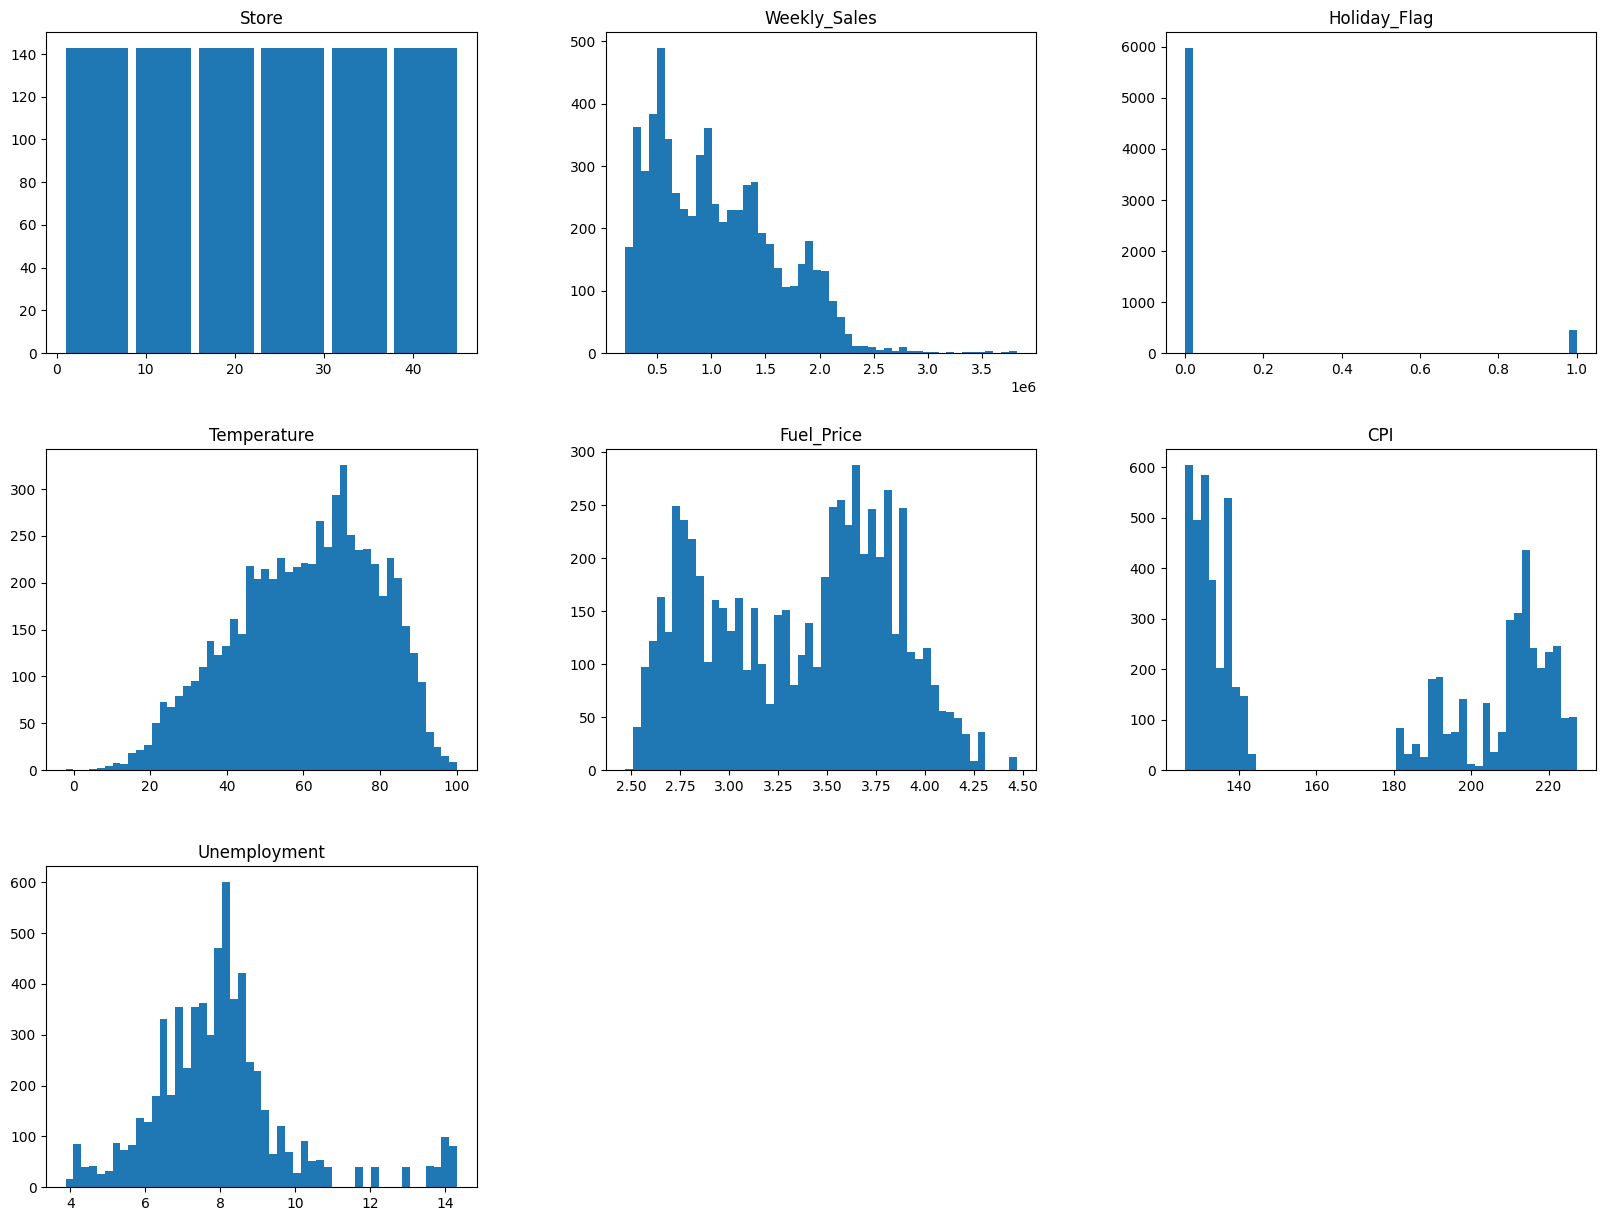

In [11]:
#plotting histogram of all numeric values
df.hist(bins=50, grid=False, figsize=(20,15));

In [12]:
#Generating Descriptive Statistics
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [39]:
questions=['1.Which stores have the highest and lowest weekly sales?',
           '2.Do certain stores perform better during holidays?',
           '3.How do holidays influence sales in different stores?',
           '4.Does unemployment rate have any impact on sales?']

questions

['1.Which stores have the highest and lowest weekly sales?',
 '2.Do certain stores perform better during holidays?',
 '3.How do holidays influence sales in different stores?',
 '4.How do weekly sales vary across different stores over time?']

In [14]:
#1.Which stores have the highest and lowest weekly sales?
# Step 2: Group by Store and Calculate Total Weekly Sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [15]:
# Step 3: Find the Store with the Highest and Lowest Weekly Sales
max_sales_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]
min_sales_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]

print("Store with the Highest Weekly Sales:")
print(f"Store: {max_sales_store['Store']}, Total Weekly Sales: ${max_sales_store['Weekly_Sales']:.2f}")

print("\nStore with the Lowest Weekly Sales:")
print(f"Store: {min_sales_store['Store']}, Total Weekly Sales: ${min_sales_store['Weekly_Sales']:.2f}")

Store with the Highest Weekly Sales:
Store: 20.0, Total Weekly Sales: $301397792.46

Store with the Lowest Weekly Sales:
Store: 33.0, Total Weekly Sales: $37160221.96


In [16]:
# Set the style for plots
sns.set(style="whitegrid")

<ipython-input-17-55f6ef7242bc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')


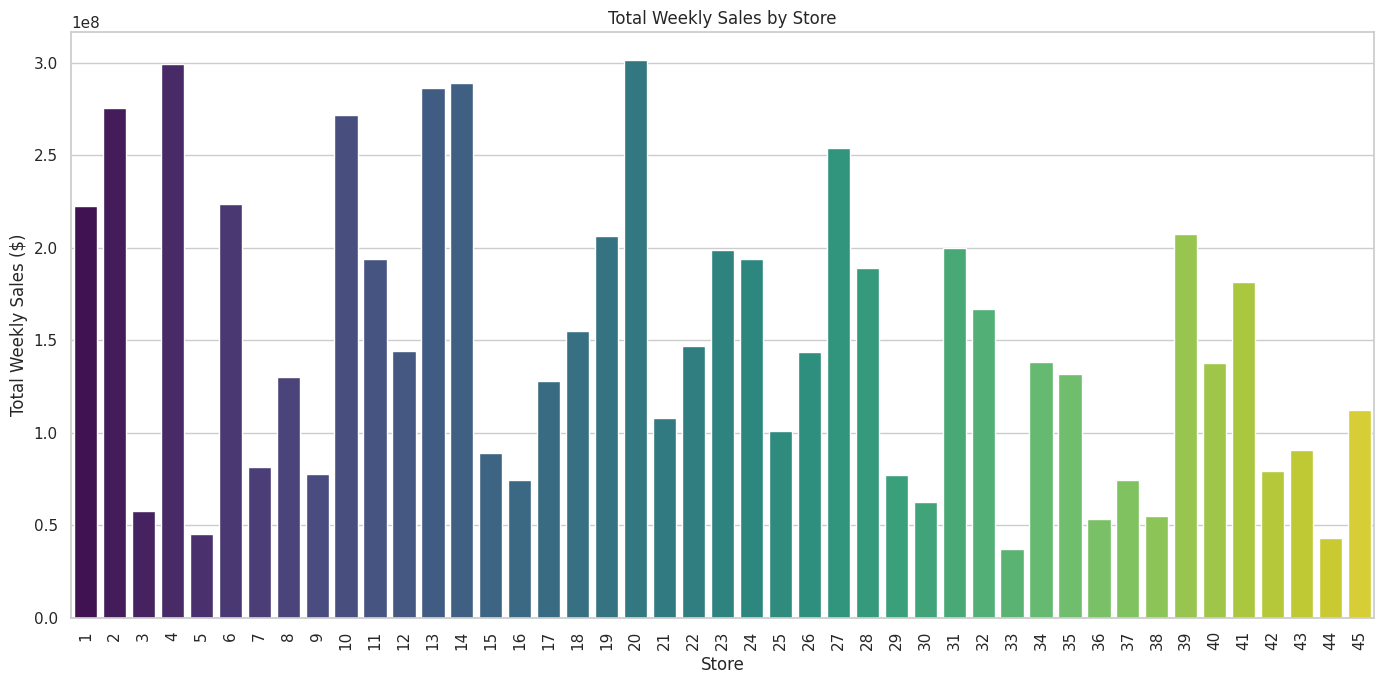

In [17]:
# Step 4: Plot Total Weekly Sales by Store

# Plot 1: Bar Plot of Weekly Sales by Store
plt.figure(figsize=(14, 7))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales ($)')
plt.title('Total Weekly Sales by Store')
plt.tight_layout()

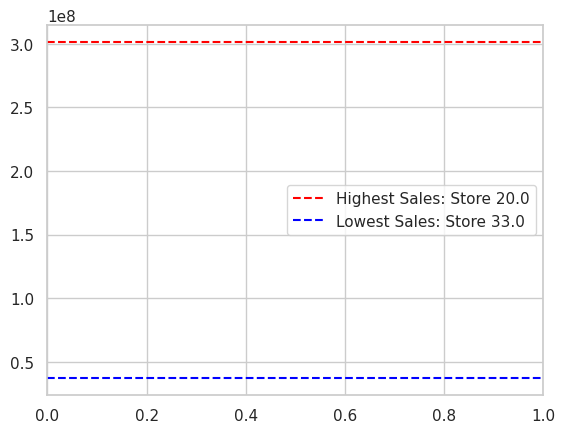

In [19]:
# Highlight the highest and lowest sales
plt.axhline(max_sales_store['Weekly_Sales'], color='red', linestyle='--', label=f'Highest Sales: Store {max_sales_store["Store"]}')
plt.axhline(min_sales_store['Weekly_Sales'], color='blue', linestyle='--', label=f'Lowest Sales: Store {min_sales_store["Store"]}')
plt.legend()

# Show plot
plt.show()

<ipython-input-20-66d08aee45ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Store', y='Weekly_Sales', data=df, palette='viridis')


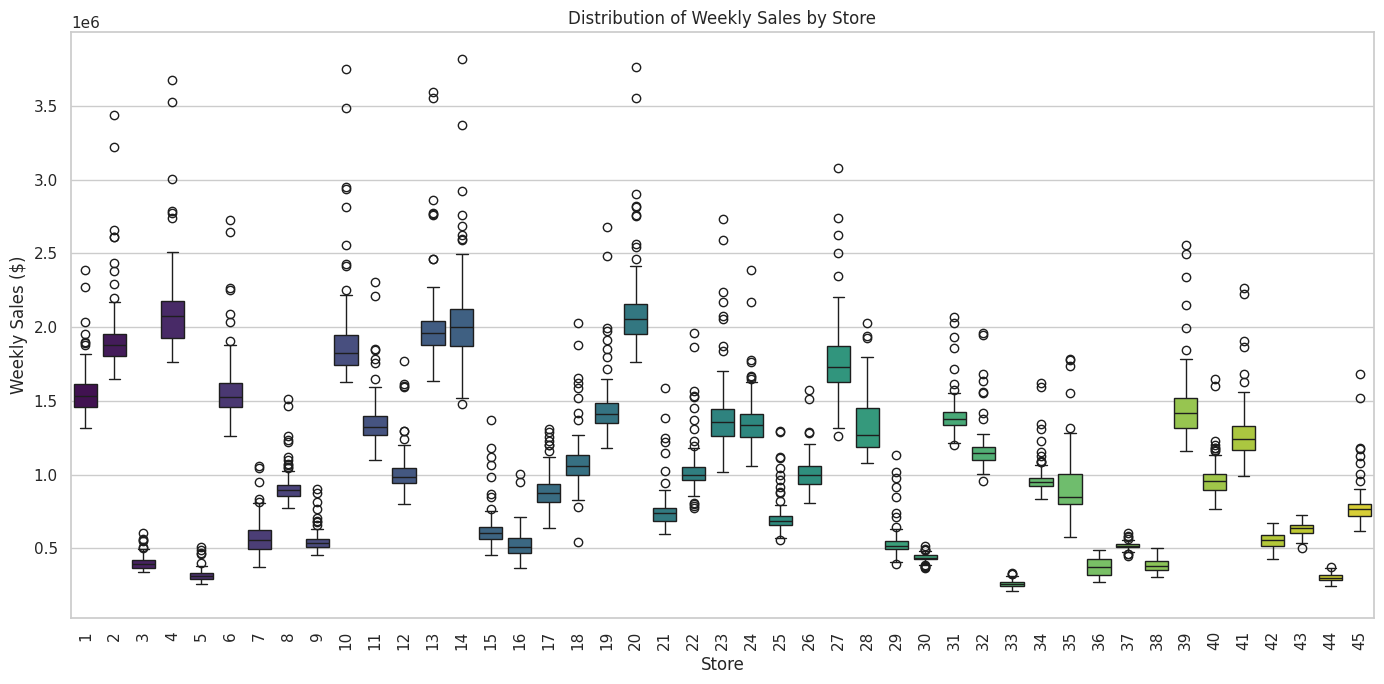

In [20]:
# Plot 2: Box Plot of Weekly Sales by Store
plt.figure(figsize=(14, 7))
sns.boxplot(x='Store', y='Weekly_Sales', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Store')
plt.ylabel('Weekly Sales ($)')
plt.title('Distribution of Weekly Sales by Store')
plt.tight_layout()

# Show plot
plt.show()

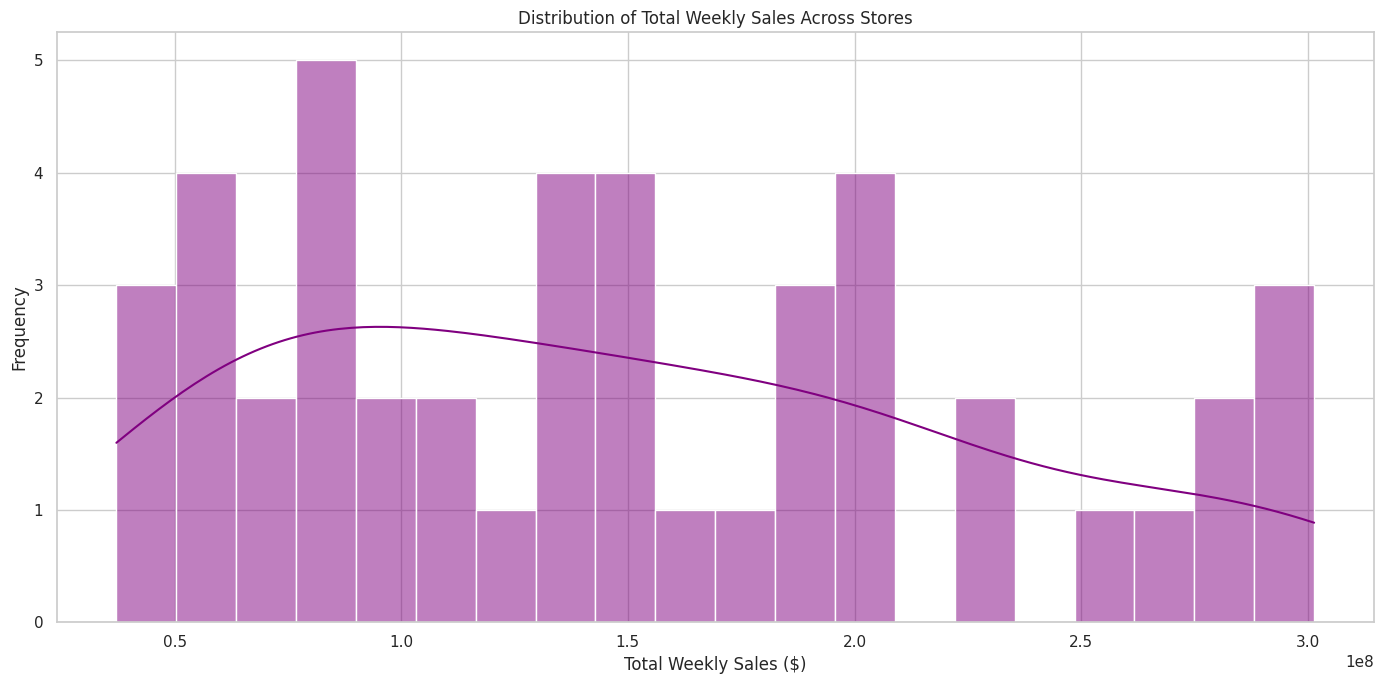

In [21]:
# Plot 3: Histogram of Weekly Sales
plt.figure(figsize=(14, 7))
sns.histplot(store_sales['Weekly_Sales'], bins=20, kde=True, color='purple')
plt.xlabel('Total Weekly Sales ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Weekly Sales Across Stores')
plt.tight_layout()

# Show plot
plt.show()

In [24]:
#2.Do certain stores perform better during holidays?
# Step 2: Aggregate Sales by Store and Holiday Flag
store_holiday_sales = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].sum().reset_index()

# Pivot table for better comparison
pivot_sales = store_holiday_sales.pivot(index='Store', columns='Holiday_Flag', values='Weekly_Sales').fillna(0)
pivot_sales.columns = ['Non-Holiday_Sales', 'Holiday_Sales']

# Add a column for the difference
pivot_sales['Sales_Difference'] = pivot_sales['Holiday_Sales'] - pivot_sales['Non-Holiday_Sales']

# Find stores with the largest positive difference
top_performers = pivot_sales[pivot_sales['Sales_Difference'] > 0].sort_values(by='Sales_Difference', ascending=False)
worst_performers = pivot_sales[pivot_sales['Sales_Difference'] < 0].sort_values(by='Sales_Difference')

print("Top Performing Stores During Holidays:")
print(top_performers.head())

print("\nWorst Performing Stores During Holidays:")
print(worst_performers.head())

Top Performing Stores During Holidays:
Empty DataFrame
Columns: [Non-Holiday_Sales, Holiday_Sales, Sales_Difference]
Index: []

Worst Performing Stores During Holidays:
       Non-Holiday_Sales  Holiday_Sales  Sales_Difference
Store                                                    
20          2.789074e+08    22490350.81     -2.564171e+08
4           2.771129e+08    22431026.24     -2.546819e+08
14          2.677941e+08    21205829.98     -2.465883e+08
13          2.653873e+08    21130438.06     -2.442568e+08
2           2.545898e+08    20792669.00     -2.337971e+08


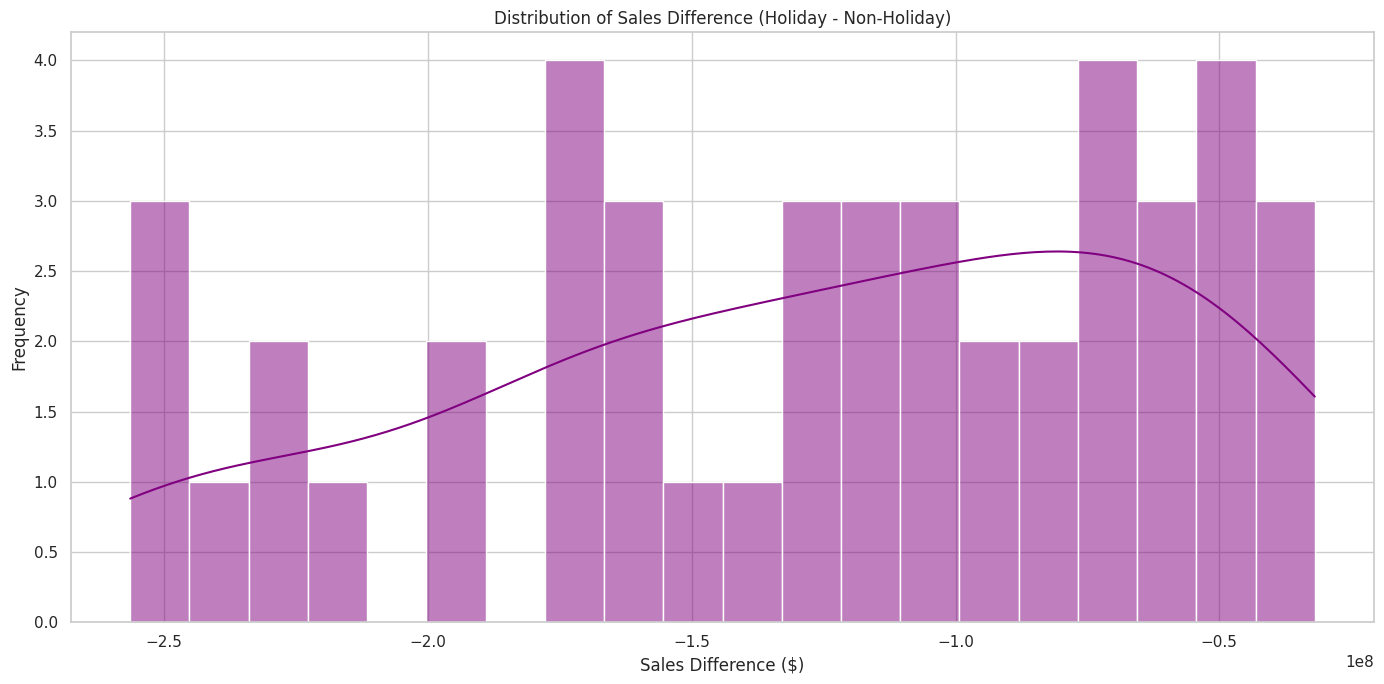

In [29]:
# Plot 3: Histogram of Sales Difference
plt.figure(figsize=(14, 7))
sns.histplot(pivot_sales['Sales_Difference'], bins=20, kde=True, color='purple')
plt.title('Distribution of Sales Difference (Holiday - Non-Holiday)')
plt.xlabel('Sales Difference ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

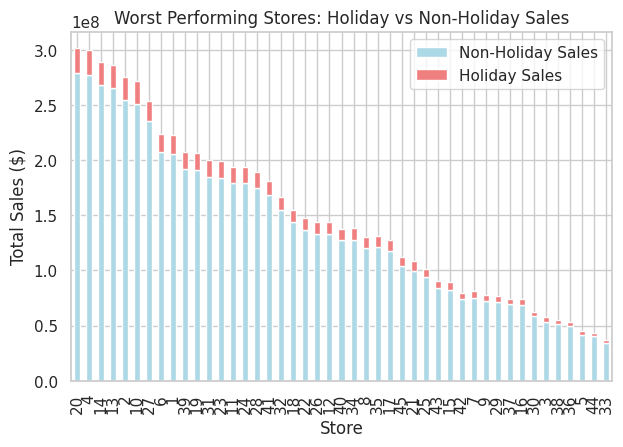

In [34]:
# Plot 2: Bar Plot of Holiday vs Non-Holiday Sales for Worst Performers
plt.figure(figsize=(14, 7))
worst_performers[['Non-Holiday_Sales', 'Holiday_Sales']].plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Worst Performing Stores: Holiday vs Non-Holiday Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales ($)')
plt.legend(['Non-Holiday Sales', 'Holiday Sales'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [41]:
#3.How do holidays influence sales in different stores?
# Step 3: Aggregate Sales
# Aggregate weekly sales by store and holiday flag
store_holiday_sales = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().reset_index()

# Pivot table to compare holiday vs non-holiday sales for each store
pivot_sales = store_holiday_sales.pivot(index='Store', columns='Holiday_Flag', values='Weekly_Sales').fillna(0)
pivot_sales.columns = ['Non-Holiday_Sales', 'Holiday_Sales']

# Calculate the percentage change in sales
pivot_sales['Percentage_Change'] = ((pivot_sales['Holiday_Sales'] - pivot_sales['Non-Holiday_Sales']) /
                                    pivot_sales['Non-Holiday_Sales']) * 100

# Sort stores by percentage change
pivot_sales_sorted = pivot_sales.sort_values(by='Percentage_Change', ascending=False)


<Figure size 1400x700 with 0 Axes>

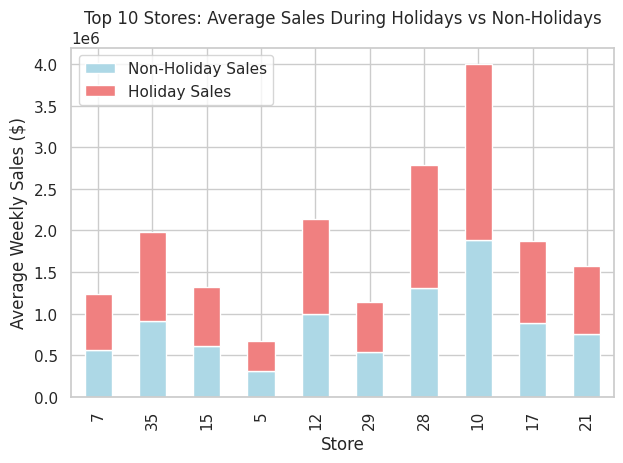

In [42]:
# Plot 1: Bar Plot of Average Sales During Holidays vs Non-Holidays
plt.figure(figsize=(14, 7))
top_stores = pivot_sales_sorted.head(10)  # Top 10 stores with highest percentage change
top_stores[['Non-Holiday_Sales', 'Holiday_Sales']].plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Top 10 Stores: Average Sales During Holidays vs Non-Holidays')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales ($)')
plt.legend(['Non-Holiday Sales', 'Holiday Sales'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-43-4c594bd3e719>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_sales_sorted.index, y='Percentage_Change', data=pivot_sales_sorted, palette='coolwarm')


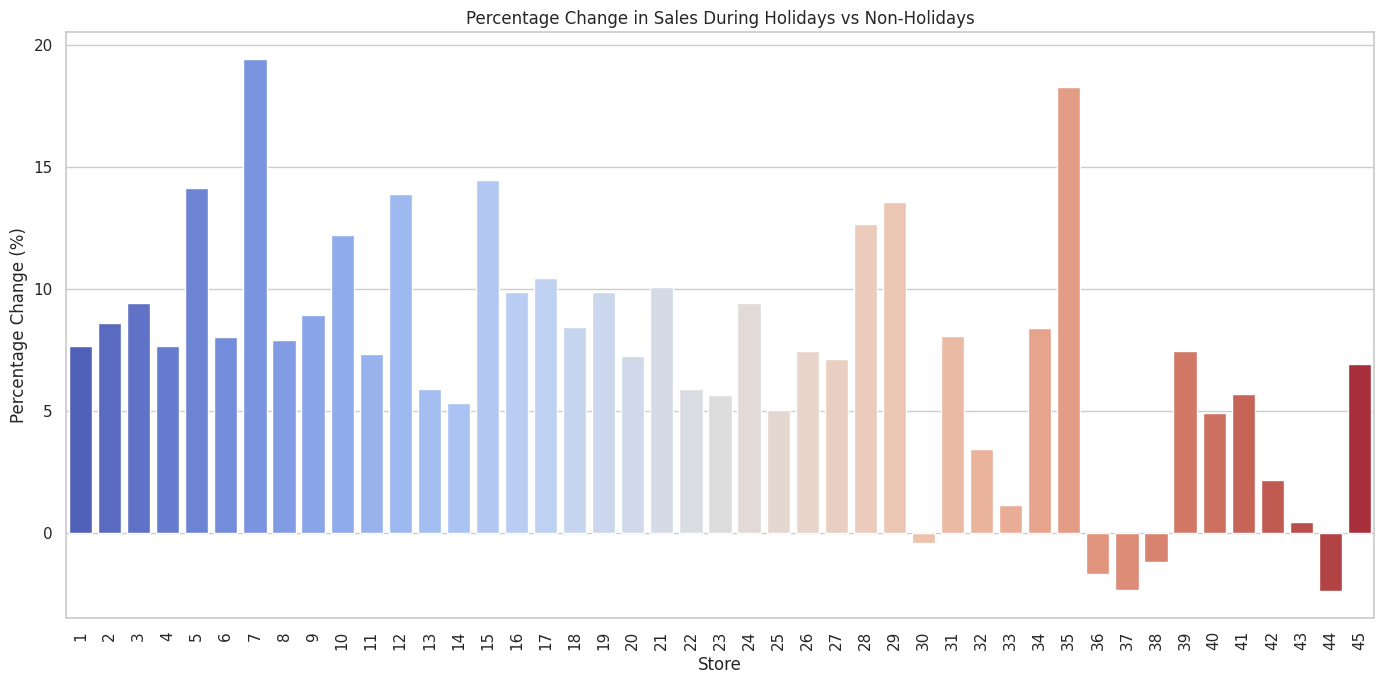

In [43]:
# Plot 2: Bar Plot of Percentage Change in Sales
plt.figure(figsize=(14, 7))
sns.barplot(x=pivot_sales_sorted.index, y='Percentage_Change', data=pivot_sales_sorted, palette='coolwarm')
plt.title('Percentage Change in Sales During Holidays vs Non-Holidays')
plt.xlabel('Store')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

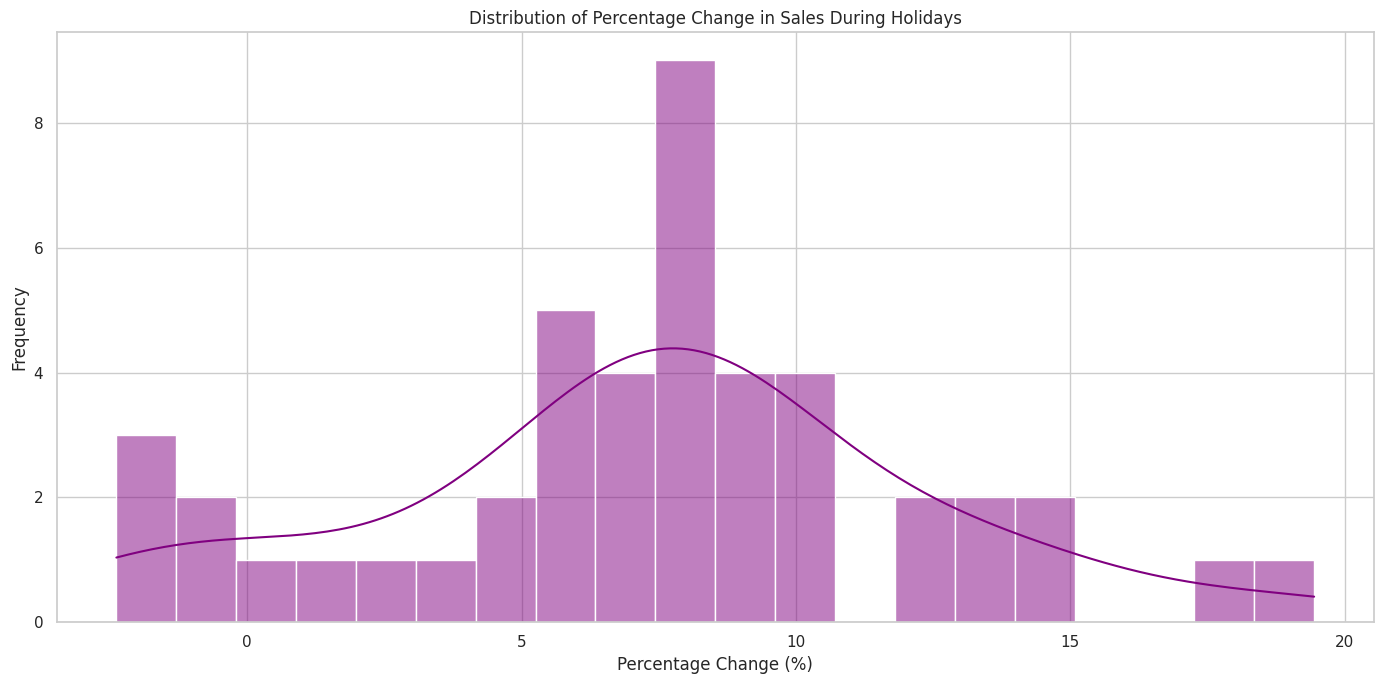

In [44]:
# Plot 3: Histogram of Percentage Change in Sales
plt.figure(figsize=(14, 7))
sns.histplot(pivot_sales['Percentage_Change'], bins=20, kde=True, color='purple')
plt.title('Distribution of Percentage Change in Sales During Holidays')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [47]:
#4.Does unemployment rate have any impact on sales?
# Check for and handle missing values
df = df.dropna(subset=['Weekly_Sales', 'Unemployment'])

# Step 3: Aggregate Sales and Unemployment Rates
# Aggregate sales by date
daily_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Aggregate unemployment rates by date
daily_unemployment = df.groupby('Date')['Unemployment'].mean().reset_index()

# Merge sales and unemployment data
merged_data = pd.merge(daily_sales, daily_unemployment, on='Date')

# Step 4: Analyze Correlation
# Calculate correlation between sales and unemployment
correlation = merged_data['Weekly_Sales'].corr(merged_data['Unemployment'])
print(f'Correlation between Weekly Sales and Unemployment: {correlation:.2f}')

Correlation between Weekly Sales and Unemployment: 0.00


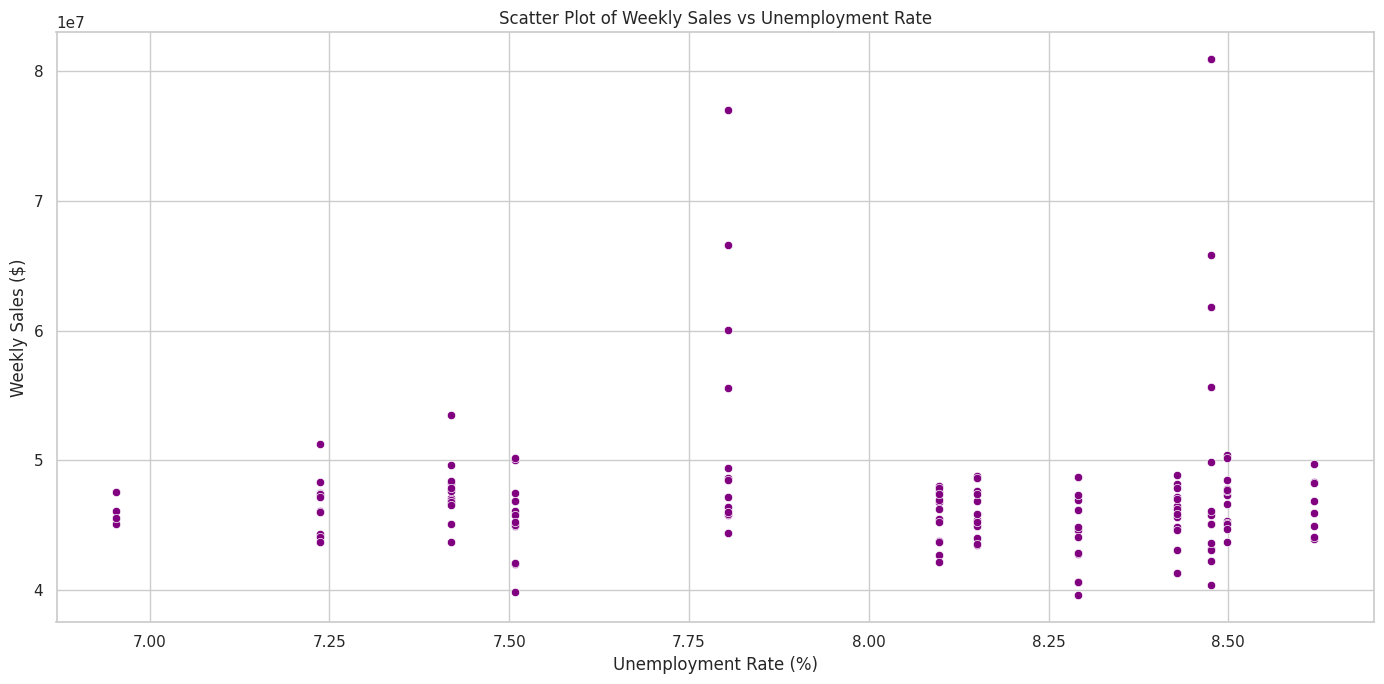

In [48]:
# Plot 1: Scatter Plot of Sales vs Unemployment Rate
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=merged_data, color='purple')
plt.title('Scatter Plot of Weekly Sales vs Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

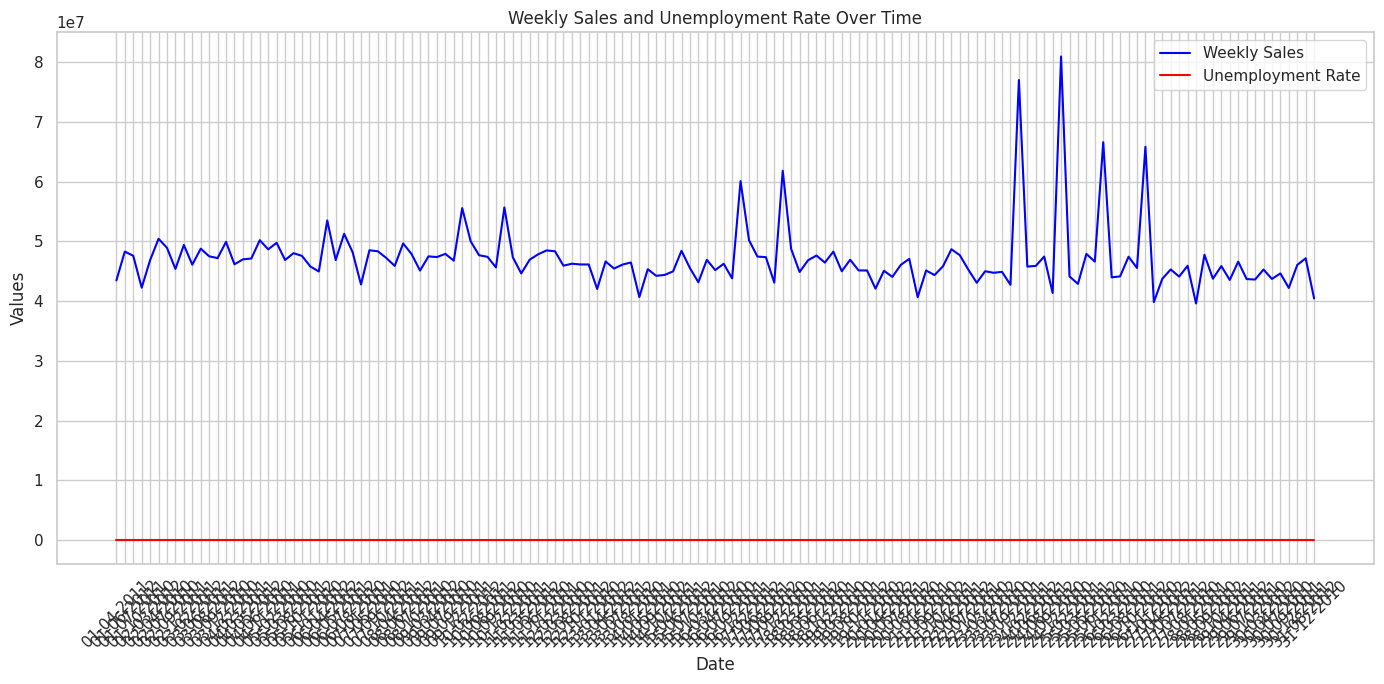

In [49]:
# Plot 2: Line Plot of Sales and Unemployment Rate Over Time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.plot(merged_data['Date'], merged_data['Unemployment'], label='Unemployment Rate', color='red')
plt.title('Weekly Sales and Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

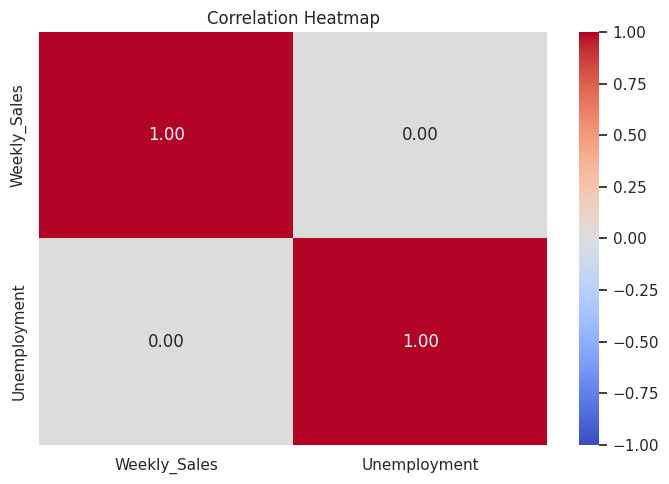

In [50]:
# Plot 3: Heatmap of Correlation
correlation_matrix = merged_data[['Weekly_Sales', 'Unemployment']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()